In [2]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter
stop_words = set(stopwords.words('english')) 

In [13]:
files = glob.glob('/Users/miriamblumenthal/Desktop/Desktop/GoogleTake2/search+youtube_v4/*.csv')

In [91]:
df_2020 = df_2020_weekend_events = df_2020_weekday_events = df_jan = df_feb = df_march = df_april = df_may = df_june = df_2019 = df_jan_march = df_health = pd.DataFrame(columns=pd.read_csv(files[0]).columns)
for f in files:
    df = pd.read_csv(f)
    df_jan = df_jan.append(df[(df.years == 2020) & (df.months == 1)], ignore_index=True)
    df_feb = df_feb.append(df[(df.years == 2020) & (df.months == 2)], ignore_index=True)
    df_march = df_march.append(df[(df.years == 2020) & (df.months == 3)], ignore_index=True)
    df_april = df_april.append(df[(df.years == 2020) & (df.months == 4)], ignore_index=True)
    df_may = df_may.append(df[(df.years == 2020) & (df.months == 5)], ignore_index=True)
    df_june = df_june.append(df[(df.years == 2020) & (df.months == 6)], ignore_index=True)
    df_health = df_health.append(df[df.all_categories == "Health"], ignore_index=True)
#     df_news = df_news.append(df[df.all_categories == "News"], ignore_index=True)
df_health

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,ratings,action,dislikes,likes,...,days,hours,minutes,weekdays,link,titles,source,query,datetime,all_categories
0,28,28,28,28,848,848,NaN,Searched,NaN,NaN,...,2,21,17,3,NaN,NaN,search,dementia,2020-01-02 21:17:00,Health
1,83,83,83,83,793,793,NaN,Searched,NaN,NaN,...,7,3,39,1,NaN,NaN,search,can you submit writing supplement after deadline,2020-01-07 03:39:00,Health
2,84,84,84,84,792,792,NaN,Visited,NaN,NaN,...,7,3,39,1,NaN,NaN,search,Submitting the Writing Supplement,2020-01-07 03:39:00,Health
3,85,85,85,85,791,791,NaN,Searched,NaN,NaN,...,7,3,42,1,NaN,NaN,search,can you submit upenn supplements after the dea...,2020-01-07 03:42:00,Health
4,91,91,91,91,785,785,NaN,Searched,NaN,NaN,...,7,3,54,1,NaN,NaN,search,can u send your supplements after deadline u of r,2020-01-07 03:54:00,Health
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3946,4420,4420,4420,4420,488,145,NaN,Visited,NaN,NaN,...,20,14,23,2,NaN,NaN,search,"Genetic analysis an integrated approach (Book,...",2020-05-20 14:23:00,Health
3947,4421,4421,4421,4421,487,144,NaN,Visited,NaN,NaN,...,20,14,23,2,NaN,NaN,search,Genetic analysis : an integrated approach (Boo...,2020-05-20 14:23:00,Health
3948,4476,4476,4476,4476,433,90,NaN,Searched,NaN,NaN,...,21,18,44,3,NaN,NaN,search,you are studying several types of an e coli he...,2020-05-21 18:44:00,Health
3949,4533,4533,4533,4533,379,36,NaN,Visited,NaN,NaN,...,25,12,2,0,NaN,NaN,search,"Peter R. Mariuz, M.D. - University of Rocheste...",2020-05-25 12:02:00,Health


In [61]:
def tokenize(df_name):
    text = df_name['query'].tolist()
    map(word_tokenize, text)
    df_name['query'].apply(word_tokenize)
    df_name['query'].apply(word_tokenize).tolist()
    tagged_list = nltk.pos_tag_sents(df_name['query'].apply(word_tokenize).tolist())
#     print(tagged_list)

In [62]:
def get_nouns():
    noun_list = []
    for i in tagged_list:
        temp = [j[0] for j in i if j[1].startswith("NN" or "NNP" or "NNS" or "NNPS")]
        noun_list.append(temp)


    noun_list = [[x.lower() for x in sublst] for sublst in noun_list]

#     print(noun_list)

In [63]:
def get_adj():
    adj_list = []
    for i in tagged_list:
        temp = [j[0] for j in i if j[1].startswith("JJ" or "JJR" or "JJS")]
        adj_list.append(temp)

    adj_list = [[x.lower() for x in sublst] for sublst in adj_list]

#     print(adj_list)

In [64]:
def get_verbs():
    verb_list = []
    for i in tagged_list:
        temp = [j[0] for j in i if j[1].startswith("VB" or "VBD" or "VBG" or "VBN" or "VBP" or "VBZ")]
        verb_list.append(temp)

    verb_list = [[x.lower() for x in sublst] for sublst in verb_list]

#     print(verb_list)

In [114]:
def bigram(list_name): 
    string = ""
    for l in list_name:
        if len(l) > 1:
            for word in l:
                string = string + " " + word
            tokens = nltk.word_tokenize(string)  
            bigrm = nltk.bigrams(tokens) 
            print(*map('-'.join, bigrm), sep=', ')
        else:
            print(l)
        string = ""
    
def np_bigram(list_name): 
    string = ""
    for l in list_name:
        if len(l) > 1:
            for word in l:
                string = string + " " + word
            tokens = nltk.word_tokenize(string)  
            bigrm = nltk.bigrams(tokens) 
#             print(*map('-'.join, bigrm), sep=', ')
        else:
             print(l)
        string = ""

In [133]:
tokenize(df_health)
get_nouns()
get_adj()
get_verbs()
bigram(noun_list)
print(bigrm)
bigram_list =[]
for i in bigrm:
    bigram_list.append(i)
    
bigram_list

['dementia']
supplement-deadline
writing-supplement
supplements-deadline
supplements-u, u-r
supplements-u, u-r, r-app
supplements-deadline, deadline-app
supplements-email
supplements-deadline, deadline-app
vision-rwanda
problems-minneapolis
problems-minneapolis, minneapolis-st, st-paul, paul-thrillist
['blister']
cold-sore, sore-fever, fever-blister, blister-intermountain, intermountain-healthcare
['device']
hepatitis-b
hepatitis-b
coronavirus-treatment
treatment-coronavirus
treatment-coronavirus
coronavirus-drugs
coronavirus-drugs
coronavirus-outbreak, outbreak-coronavirus, coronavirus-drugs, drugs-vaccines
public-health, health-guidance, guidance-potential, potential-covid-19, covid-19-exposure, exposure-cdc
['blushing']
['blushing']
cases-u.s., u.s.-|, |-cdc
cdc-coronavirus, coronavirus-map
sign-coronavirus
elbow-joint, joint-itchy
paresthesia-arms, arms-avoid
['deaths']
meal-plans, plans-u, u-r
sex-positions
sex-positions, positions-kama, kama-sutra, sutra-tips, tips-hot, hot-fun, 

home-remedies, remedies-cough, cough-mucus
ways-phlegm, phlegm-mucus
color-phlegm, phlegm-mean, mean-ohio, ohio-state, state-medical, medical-center
blood-sputum, sputum-causes, causes-diagnosis, diagnosis-doctor
mucus-emergency, emergency-|, |-inogen
health-benefits, benefits-cinnamon, cinnamon-healthline
cases-u.s., u.s.-|, |-cdc
['cvs']
cvs-mt
['cvs']
cvs-mt
cvs-health, health-jobs, jobs-career, career-opportunities, opportunities-change
['cvs']
cvs-health, health-jobs, jobs-career, career-opportunities, opportunities-change
cvs-health, health-senior, senior-consultant, consultant-salaries, salaries-|, |-glassdoor
cvs-health, health-senior, senior-consultant, consultant-interview, interview-questions, questions-|, |-glassdoor
stress-productivity
cvs-mt
['cvs']
smile-direct, direct-club
smile-club, club-stock
insomnia-cookies
insomnia-cookies
smile-direct
smile-direct, direct-club
smile-club, club-revenue
heart-rate, rate-zones
heart-rate
heart-rate, rate-too, too-high, high-healthli

cvs-pharmacy, pharmacy-job, job-description, description-license
california-pharmacy, pharmacy-license
california-pharmacy, pharmacy-license, license-requirements
license-pharmacy
cvs-board, board-pharmacy
license-pharmacy, pharmacy-technician, technician-york
pharmacy-technicians, technicians-california
certified-pharmacy, pharmacy-technician, technician-make, make-california
kaiser-permanente, permanente-phlebotomist, phlebotomist-salaries, salaries-united, united-states
phlebotomist-make, make-york
phlebotomist-make, make-new, new-york, york-ny
lenspure-contact, contact-lenses
nha-discount, discount-code
nhs-discount, discount-code
health-career, career-association
lenspure-contact, contact-lenses
radiology-technician
kidney-disease, disease-deafness
syndrome-treatment
alport-syndrome, syndrome-females
['edema']
pressure-ears
pressure-ears, ears-kidney, kidney-problems
organ-|, |-jennifer, jennifer-raye, raye-|, |-medicine
blurry-urine
['organs']
['phlebotomist']
['gradient']
[]
rog

anorexia-nervosa, nervosa-–, –-highest, highest-mortality, mortality-rate, rate-any, any-mental, mental-disorder
look-reflexes, reflexes-health, health-encyclopedia, encyclopedia-university
antidepressants-reaction, reaction-time
antidepressants-brain, brain-architecture, architecture-los
['memory']
['memory']
adele-disorder
sex-education
causes-cloudy, cloudy-news, news-today
cloudy-urine, urine-symptoms, symptoms-signs, signs-causes, causes-treatment, treatment-medicinenet
discharge-causes, causes-discharge
['discharge']
discharge-normal, normal-brown, brown-discharge, discharge-yellow
mucus-discharge
vaginal-discharge, discharge-color, color-guide, guide-causes, causes-doctor
orange-discharge
dr-gynaecologist
ronika-choudhary, choudhary-md, md-facog, facog-|, |-women, women-health, health-connecticut
dr-narla, narla-gynecologist
anupama-narla, narla-md, md-|, |-women, women-health, health-connecticut
sex-education
['paracetamol']
[]
uti-symptoms
tract-infection, infection-uti, uti-s

medical-school, school-application, application-timeline, timeline-prehealthadvising
osteopathic-medical, medical-school, school-aacom
record-|, |-autism, autism-speaks
autism-speaks, speaks-changes, changes-mission
aba-therapy, therapy-examples, examples-cost, cost-controversy, controversy-healthline
cochlear-implants
dengue-pronunciation
dengue-fever, fever-pronunciation
['originate']
aamc-tomorrow, tomorrow-doctors, doctors-tomorrow, tomorrow-cures
alekhya-thota, thota-|, |-center, center-injury, injury-biomechanics, biomechanics-materials
rutgers-school, school-dental, dental-medicine
rsdm-dental
rutgers-school, school-dental, dental-medicine
['sequelae']
['comorbidity']
['adhd']
anxiety-autism
anxiety-autism, autism-%
anxiety-autism, autism-|, |-statistics, statistics-issues, issues-research, research-autism
anxiety-autism
['autism']
anxiety-autism
aamc-tomorrow, tomorrow-doctors, doctors-tomorrow, tomorrow-cures
school-application, application-amcas
premed-calendar, calendar-aamc

lexapro-side, side-effects, effects-your, your-radar, radar-side
['vs']
depression-symptoms
anxiety-disorder
['anxiety']
disorder-symptoms
['lucid']
['dreams']
['dreams']
lexapro-symptoms
depression-antidepressants, antidepressants-feel
signs-antidepressant, antidepressant-everyday, everyday-health
university-health, health-service, service-uhs
['cvs']
angle-arrival, arrival-angle, angle-departure, departure-silicon, silicon-labs
['pimple']
blackheads-pore, pore-winer, winer-dr., dr.-pimple
['pimple']
pore-winer, winer-nose
['sarcoidosis']
school-nursing
doctor-sleep
['careers']
careers-medtronic
kinsey-scale
kinsey-scale, scale-wikipedia
['viral']
['vicks']
mentholatum-vs, vs-vicks
difference-product, product-vicks, vicks-amazon.com
products-acne
relajante-muscular
cvs-health, health-wikipedia
cvs-health
cvs-health, health-homepage
['parasite']
['test']
cervix-images
lesion-translation
lesion-translate
workplace-mental, mental-health, health-training, training-leadership, leadership-r

u.s-flu, flu-season, season-burden, burden-estimates, estimates-|, |-cdc
fda-vaccine, vaccine-denier, denier-free, free-speech, speech-opponent, opponent-james, james-lyons
emt-exam, exam-practice, practice-questions
dosage-epinephrine
['edema']
['embolism']
['pneumothorax']
heart-failure
acute-gastroenteritis
appendix-side
naloxone-dose
narcan-evzio, evzio-naloxone, naloxone-dosing, dosing-indications, indications-interactions, interactions-adverse
countries-donation
school-pre, pre-reqs
['school']
['positions']
topics-health
psychology-coronavirus, coronavirus-anxiety
media-fear, fear-coronavirus, coronavirus-outbreak, outbreak-|, |-psychology, psychology-today
panic-fear, fear-coronavirus
coronavirus-start
cdc-counting, counting-coronavirus
update-health, health-response, response-coronavirus, coronavirus-disease
mortality-rate, rate-flu
u.s-flu, flu-season, season-burden, burden-estimates, estimates-|, |-cdc
mortality-rate, rate-flu, flu-worldwide
novel-coronavirus, coronavirus-dis

[]

In [85]:
bigram(adj_list)

[]
[]
[]
['upenn']
['deadline']
deadline-common
['common']
[]
['common']
[]
[]
[]
[]
[]
['therapeutic']
[]
[]
[]
[]
[]
[]
[]
['top']
[]
[]
[]
[]
[]
[]
upper-red
[]
flu-total
[]
[]
['best']
['best']
['pelvic']
[]
[]
['pelvic']
[]
[]
[]
[]
[]
[]
[]
[]
['american']
[]
['medical']
['cervical']
[]
['sacral']
[]
[]
['chief']
['implant']
[]
['dental']
['great']
[]
[]
[]
[]
['baylor']
[]
[]
[]
['long']
[]
[]
[]
['i']
[]
[]
[]
['vs']
[]
['cortical']
[]
['cortical']
[]
['deep']
[]
[]
['nutritious']
[]
['uncomfortable']
['need-supportive']
['many']
[]
[]
direct-indirect
[]
['retroviral']
[]
[]
['free']
[]
[]
[]
epidemic-pandemic
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['pre-med']
[]
[]
[]
unpleasant-less, less-intense
['equivocal']
[]
[]
positive-negative, negative-aboud
positive-negative
positive-negative
recent-intergroup
recent-intergroup
[]
['glucose']
many-amino
[]
[]
[]
[]
[]
[]
[]
[]
['obese']
['wf1000xm3']
[]
[]
[]
insoluble-specific
[]
[]
[]
['genetic']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

psychiatric-strong
[]
['antipsychotic']
['much']
[]
['oral']
['intrusive']
[]
[]
['watery']
[]
[]
['serial']
[]
['hard']
['other']
['bad']
average-first
mental-illness, illness-residential
mental-illness, illness-residential
[]
[]
[]
[]
['oral']
['fat']
[]
[]
[]
[]
[]
sexual-instant
[]
[]
['//amp.colgate.com/en-us/oral-health/conditions/bad-breath/how-to-get-rid-of-garlic-breath-0816']
[]
[]
[]
best-last
['last']
[]
[]
[]
['//nypost.com/2020/03/06/coronavirus-symptoms-whats-the-difference-between-a-dry-and-wet-cough/amp/']
[]
[]
['common']
[]
[]
long-last
long-last, last-more
['//www.healthline.com/health/pregnancy/ovulation-when-am-i-most-fertile']
['horrible']
[]
['asymptomatic']
[]
[]
[]
closer-top
itchy-vaginal
['vaginal']
['more']
['pee']
[]
[]
['pediatric']
[]
['urgent']
[]
[]
['yeast']
yeast-vaginal
['yeast']
[]
['chlamydia']
[]
[]
[]
[]
[]
[]
['yeast']
[]
[]
[]
urine-medical
['urine']
['urine']
['urine']
[]
[]
['urinary']
[]
['yeast']
[]
[]
['yeast']
['yeast']
['chlamydia']
[]


[]
['vaginal']
[]
[]
[]
['vaginal']
['vaginal']
[]
[]
['nauseous']
['healthy']
[]
[]
[]
[]
['old']
['new']
[]
[]
[]
[]
[]
[]
[]
[]
['common']
['common']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['foamy']
['i']
[]
[]
[]
['mental']
['daily']
['smart']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['cerebral']
[]
['ulcerative']
['ulcerative']
[]
[]
[]
[]
[]
[]
['mental']
teddy-histrionic
teddy-histrionic
['histrionic']
['histrionic']
['psychiatric']
[]
[]
[]
['//convoswithcosmo.com/prostate-milking/']
[]
[]
['//www.vice.com/amp/en_us/article/ezjyqj/better-than-pooping-what-it-feels-like-to-have-a-prostate-orgasm']
[]
[]
[]
['//www.hvmag.com/hudson-river-state-hospital-hudson-heritage/']
['psychiatric']
[]
['pussy']
sanatorium.upstate-new
['psychiatric']
[]
['type']
['more']
[]
['susceptible']
[]
[]
['pelvic']
[]
[]
['multiple']
[]
[]
[]
acute-high
[]
seasonal-affective
[]
[]
[]
['aspirin']
['many']
[]
[]
[]
[]
[]
[]
[]
['coronavirus']
[]
['sexual']
[]
[]
[]
[]
[]
[]
[]
[]
['current']
[]
['coronavirus']
[]
[]
[]
['posi

In [86]:
bigram(verb_list)

[]
submit-writing
['submitting']
['submit']
u-send
[]
[]
['send']
['send']
[]
[]
[]
[]
['is']
[]
[]
[]
[]
[]
[]
['found']
['approved']
[]
[]
[]
[]
[]
[]
is-itching
[]
['waking']
[]
[]
[]
[]
['improve']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['’']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
does-take
[]
['spot']
[]
do-have, have-do, do-do
[]
[]
add-adhd
["'s"]
[]
[]
[]
[]
['studying']
[]
[]
[]
is-creating
[]
[]
[]
['make']
[]
[]
[]
[]
[]
[]
[]
testing-being, being-conducted
[]
was-controlled
[]
[]
[]
[]
[]
[]
[]
['news']
['rochester']
['testing']
[]
[]
[]
[]
['addresses']
[]
['make']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['are']
[]
[]
[]
[]
are-linked
['enhancement']
[]
[]
[]
['replace']
[]
[]
[]
adding-cause, cause-become, become-form, form-based, based-know, know-explain, explain-salts, salts-cause, cause-precipitate, precipitate-be
[]
['sciencing']
[]
['is']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['read']
[]
[]
[]
[]
['hits']
[]
[]
[]
[]
[]

['treat']
[]
[]
['removing']
['form']
['is']
[]
['popping']
['popping']
['is']
[]
[]
is-avoiding
do-go, go-fall
['does']
'm-turned
[]
[]
[]
['orgasm']
["'s"]
[]
[]
[]
[]
['smoke']
[]
[]
['used']
['treat']
psychosis-go
['is']
[]
['managing']
diabetes-look
['is']
[]
[]
[]
['understanding']
['helping']
['does']
['are']
['know']
['please']
['give']
['give']
['give']
[]
['emerged']
does-'m
is-get
[]
force-go
[]
['explained']
[]
['causes']
['helping']
[]
['does']
[]
[]
's-says
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
do-do
[]
['give']
do-keep, keep-giving
['giving']
['|']
think-dying
[]
['sneezing']
[]
['decoding']
[]
do-take, take-heal
['stay']
[]
does-smell, smell-take
[]
[]
[]
[]
['does']
[]
[]
['twitch']
[]
['persisting']
[]
[]
[]
[]
develop-'s
['having']
['america']
[]
['psychiatrist']
[]
[]
[]
[]
[]
[]
[]
[]
['is']
happens-do, do-have
[]
[]
[]
does-bleeding
[]
[]
[]
[]
['are']
[]
does-cause
[]
's-become
[]
[]
['says']
['smelling']
['might']
[]
[]
[]
[]
[]
[]
[]
['causes']
does-make
[]
is-testing


[]
[]
[]
['applying']
[]
['glucose']
[]
[]
['online']
[]
['requesting']
['request']
['diverging']
[]
['applying']
['applying']
['applying']
['premed']
['rochester']
['improved']
[]
[]
[]
[]
[]
[]
[]
[]
['applying']
['premed']
['premed']
[]
[]
use-premed
['applying']
[]
[]
[]
[]
[]
i-usa
[]
[]
[]
[]
[]
do-need, need-worry
do-need
[]
[]
[]
[]
[]
[]
[]
[]
['is']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
aid-need, need-stay
['does']
[]
['does']
[]
[]
[]
['|']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['based']
[]
[]
[]
do-have
[]
['nauseated']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['are']
[]
[]
[]
[]
['happen']
[]
["'re"]
try-'s
[]
[]
[]
['is']
['be']
['telling']
do-make, make-feel, feel-lightheaded
[]
[]
[]
[]
['cdc']
['yellow']
happens-takes
[]
[]
is-coronavirus
[]
['coronavirus']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
does-intermittent, intermittent-fasting
[]
[]
[]
[]
[]
[]
[]
[]
[]
wearing-help, help-slow
[]
[]
[]
[]
['feel']
['have']
add-adhd
[]
['generalized']
[]
[]
[]
[]
['causes']
[]
['ma

In [92]:
verb_health_queries_pop_list = ['do-have', 'get','causes', 'treat', 'do-need', 'help', 'apply', 'understanding', 'testing', 'does-take', 'taking']
adj_health_queries_pop_list = ['medical', 'dental', 'free', 'infectious', 'mental', 'common', 'american', 'many', 'pregnant', 'strong', 'best', 'much']
noun_health_queries_pop_list = ['university-rochester', 'side-effects', 'heat-transfer', 'disease-covid-19', 'cdc', 'cvs', 'covid-19-situation', 'medical-school', 'rochester-medical', 'service-uhs', 'coronavirus-update', 'situation-dashboard', 'type-diabetes', 'medical-center', 'university-health', 'developmental-behavioral', 'coronavirus-symptoms', 'health-service', 'causes-tratment', 'mayo-clinic']



In [134]:
df['datetime']= pd.to_datetime(df['datetime'])
d_verb = {
    'do-have': 0,
    'get': 1,
    'causes': 2,
    'treat': 3,
    'do-need': 4,
    'help': 5,
    'apply': 6,
    'understanding': 7,
    'testing': 8,
    'does-take': 9,
    'taking': 10
}

d_verb_2 = {
    0: 'do-have',
    1: 'get',
    2: 'causes',
    3: 'treat',
    4: 'do-need',
    5: 'help',
    6: 'apply',
    7: 'understanding',
    8: 'testing',
    9: 'does-take',
    10: 'taking'
}


IndexError: index 0 is out of bounds for axis 0 with size 0

r
c
e


Text(0.5, 1.0, 'Percentages of Key Search Terms By Week')

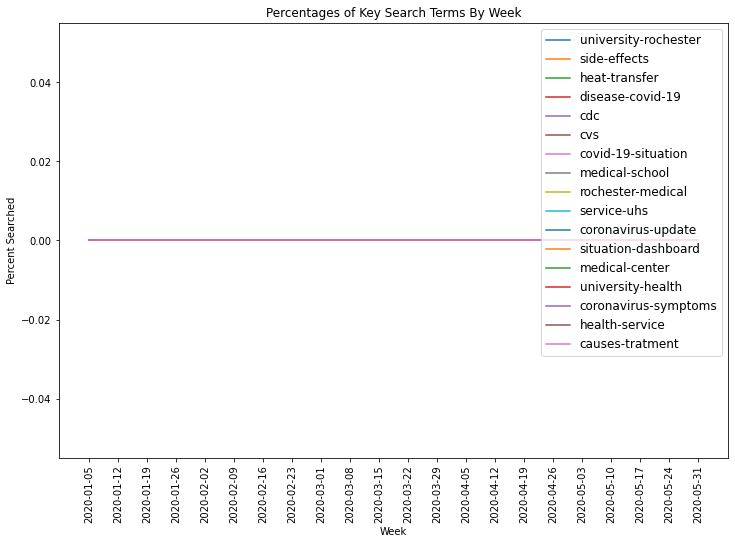

In [123]:
df['datetime']= pd.to_datetime(df['datetime'])
d_noun = {
    'university-rochester': 0,
    'side-effects': 1,
    'heat-transfer': 2,
    'disease-covid-19': 3,
    'cdc': 4,
    'cvs': 5,
    'covid-19-situation': 6,
    'medical-school': 7,
    'rochester-medical': 8,
    'service-uhs': 9,
    'coronavirus-update': 10,
    'situation-dashboard': 11,
    'medical-center': 12,
    'university-health': 13,
    'coronavirus-symptoms': 14,
    'health-service': 15,
    'causes-tratment': 16
}

d_noun_2 = {
    0: 'university-rochester',
    1: 'side-effects',
    2: 'heat-transfer',
    3: 'disease-covid-19',
    4: 'cdc',
    5: 'cvs',
    6: 'covid-19-situation',
    7: 'medical-school',
    8: 'rochester-medical',
    9: 'service-uhs',
    10: 'coronavirus-update',
    11: 'situation-dashboard',
    12: 'medical-center',
    13: 'university-health',
    14: 'coronavirus-symptoms',
    15: 'health-service',
    16: 'causes-tratment'
    
}

history = []
weekly_totals = []
labels = [] 
for week, wdf in df.set_index('datetime').groupby(pd.Grouper(freq='W')):
    if len(wdf) >0:
        wdist = [0 for i in range(17)]
        week_label = str(week).split(' ')[0]
        labels.append(week_label)
        weekly_totals.append(len(wdf))
#         print(week_label, len(wdf))
        weekly_queries = [str(q).lower() for q in wdf['query'].values.tolist()]
        np_bigram(weekly_queries)
        for q in bigram_list:
            if 'university-rochester' in q:
                wdist[d_noun['university-rochester']]+=1
            if 'side-effects' in q:
                wdist[d_noun['side-effects']]+=1
            if 'heat-transfer' in q:
                wdist[d_noun['heat-transfer']]+=1
            if 'disease-covid-19' in q:
                wdist[d_noun['disease-covid-19']]+=1
            if 'cdc' in q and 'cdcs' not in q:
                wdist[d_noun['cdc']]+=1
            if 'cvs' in q:
                wdist[d_noun['cvs']]+=1
            if 'covid-19-situation' in q:
                wdist[d_noun['covid-19-situation']]+=1
            if 'medical-school' in q:
                wdist[d_noun['medical-school']]+=1
            if 'rochester-medical' in q:
                wdist[d_noun['rochester-medical']]+=1
            if 'service-uhs' in q:
                wdist[d_noun['service-uhs']]+=1
            if 'coronavirus-update' in q:
                wdist[d_noun['coronavirus-update']]+=1
            if 'situation-dashboard' in q:
                wdist[d_noun['situation-dashboard']]+=1
            if 'medical-center' in q:
                wdist[d_noun['medical-center']]+=1
            if 'university-health' in q:
                wdist[d_noun['university-health']]+=1
            if 'coronavirus-symptoms' in q:
                wdist[d_noun['coronavirus-symptoms']]+=1
            if 'health-service' in q:
                wdist[d_noun['health-service']]+=1
            if 'causes-tratment' in q:
                wdist[d_noun['causes-tratment']]+=1
        history.append(wdist)
# print(weekly_totals)
history = np.array(history)
# print(history)
norm_hist = np.zeros((len(history), len(history[0])))
for i in range(len(history)):
    factor = weekly_totals[i]
    for j in range(len(history[0])):
        norm_hist[i][j] = float(history[i][j])/float(factor)
#         print(i,j,norm_hist[i][j],factor)


# print(history)
plt.figure(figsize=(12, 8))
for col in range(history.shape[1]):
    name = d_noun_2[col]
    y = norm_hist[:,col]
    plt.plot(range(len(y)),y,label=name)

plt.xticks(range(len(labels)),labels, rotation=90)
plt.legend(fontsize = 12)
plt.xlabel('Week')
plt.ylabel('Percent Searched')
plt.title("Percentages of Key Search Terms By Week")
